# Plot data from organism for different segmentations

Import modules:

In [1]:
import skimage
import napari
from tifffile import imread
from pathlib import Path

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

# Just load seaborn & set theme and the chart looks better:
import seaborn as sns
sns.set_context('notebook')
import os

Insert the pixel size in microns: (depending the microscope objective)  
Insert the timepoint slice where the laser ablation occurs:

In [3]:
size_pixel=0.7692 #in microns

Insert the sample csv filename and the corresponding wound csv filename:

In [3]:
file_table = '../data/features_otsu.csv'

figures_folder = '../data/results/figures/otsu/'

# Create the folder if not existant

if os.path.isdir(figures_folder) != True:
    os.mkdir(figures_folder)


In [4]:
# import the tables
#ppties = pd.read_csv(file_table_organism,sep=';')
ppties = pd.read_csv(file_table,sep=';')

In [5]:
print("Here are the available metrics :",list(ppties.columns))

Here are the available metrics : ['label', 'centroid-0', 'centroid-1', 'area', 'perimeter', 'eccentricity', 'orientation', 'axis_major_length', 'axis_minor_length', 'convexity']


## This is an example of plots that can be generated with the shape descriptors analysis

Plot organism area overtime

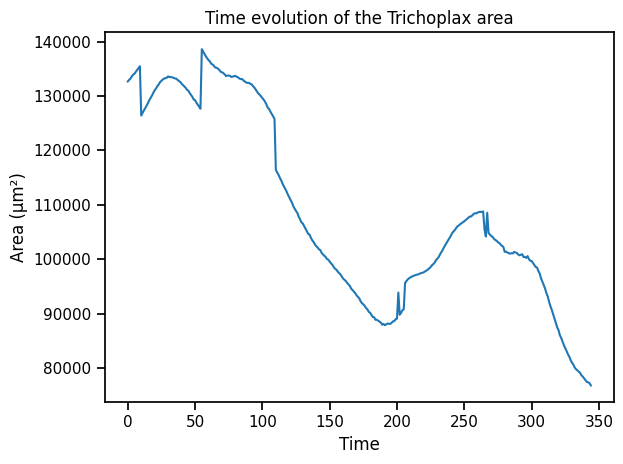

In [6]:
sns.lineplot(ppties.area*(size_pixel)*(size_pixel))
plt.ylabel('Area (µm²)')
plt.xlabel('Time')
plt.title('Time evolution of the Trichoplax area')
name = figures_folder + "trichoplax_area_time.png"
plt.tight_layout()
plt.savefig(name, dpi=300)

Plot organism perimeter. Can be used as a proxy of retraction.

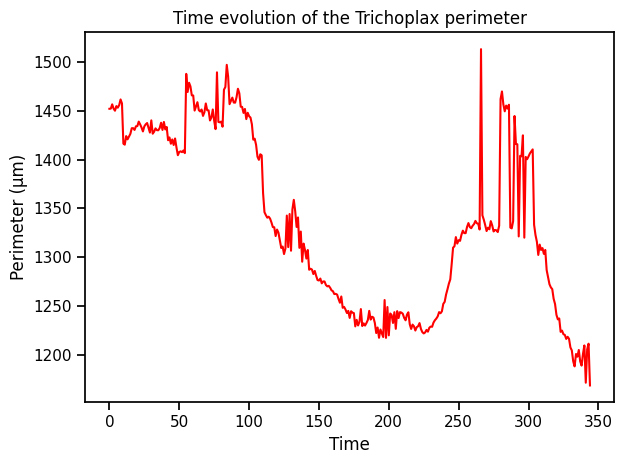

In [7]:
plt.plot(ppties.perimeter*size_pixel, 'r')
plt.ylabel('Perimeter (µm)')
plt.xlabel('Time')
plt.title('Time evolution of the Trichoplax perimeter')
name = figures_folder + "trichoplax_perimeter_time.png"
plt.tight_layout()
plt.savefig(name, dpi=300)

**Plot Eccentricity of the organism shape**  
The eccentricity is the ratio of the distance between the foci of the ellipse and its major axis length. The value is between 0 and 1. (0 and 1 are degenerate cases. An ellipse whose eccentricity is 0 is actually a circle, while an ellipse whose eccentricity is 1 is a line segment.)

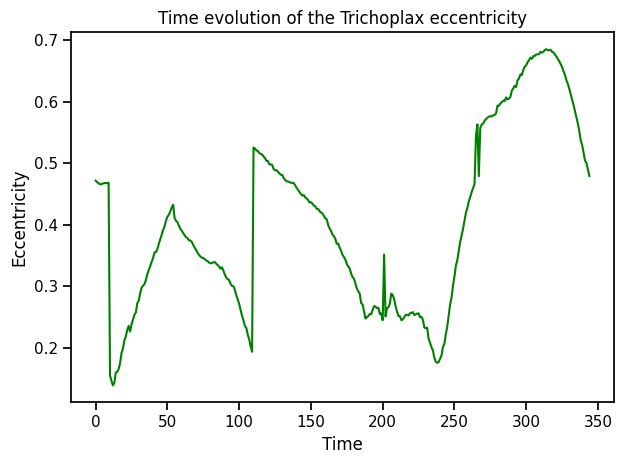

In [8]:
plt.plot(ppties.eccentricity, 'g')
plt.ylabel('Eccentricity')
plt.xlabel('Time')
plt.title('Time evolution of the Trichoplax eccentricity')
name = figures_folder + "trichoplax_eccentricity_time.png"
plt.tight_layout()
plt.savefig(name, dpi=300)

**Plot convexity of the organism**  
Below 1, it indicates how much the shape has concaved regions.

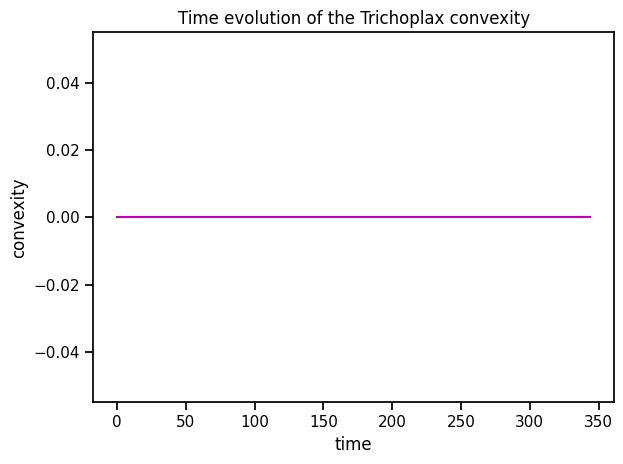

In [9]:
# PLOT CONVEXITY ORGANISM
plt.plot(ppties.convexity, 'm')
plt.ylabel('convexity')
plt.xlabel('time')
plt.title('Time evolution of the Trichoplax convexity')
name = figures_folder + "trichoplax_convexity_time.png"
plt.tight_layout()
plt.savefig(name, dpi=300)

In [48]:
sns.set_palette('colorblind')
sns.set_context("paper")

In [67]:
def compare(file_table,figures_folder,color):
    fig,ax = plt.subplots(1,3,sharex = True)
    fig.set_size_inches(15,5)

    size_pixel=0.7692 #in microns

    # Create the folder if not existant

    if os.path.isdir(figures_folder) != True:
        os.mkdir(figures_folder)
    
    # load data and compute area, perimeter, eccentricity
    
    ppties = pd.read_csv(file_table,sep=';')
    area = ppties.area*(size_pixel)*(size_pixel)
    perimeter = ppties.perimeter*size_pixel
    eccentricity = ppties.eccentricity
    prop = [area,perimeter,eccentricity]
    lab = ['Area (µm²)','Perimeter (µm)','eccentricity']
    #Plot
    for ax,prop,lab in zip(ax,prop,lab):
        ax.plot(prop,color=color)
        ax.set_title(prop.name)
        ax.set_ylabel(lab)
    
    fig.supxlabel('Time')
    plt.tight_layout()

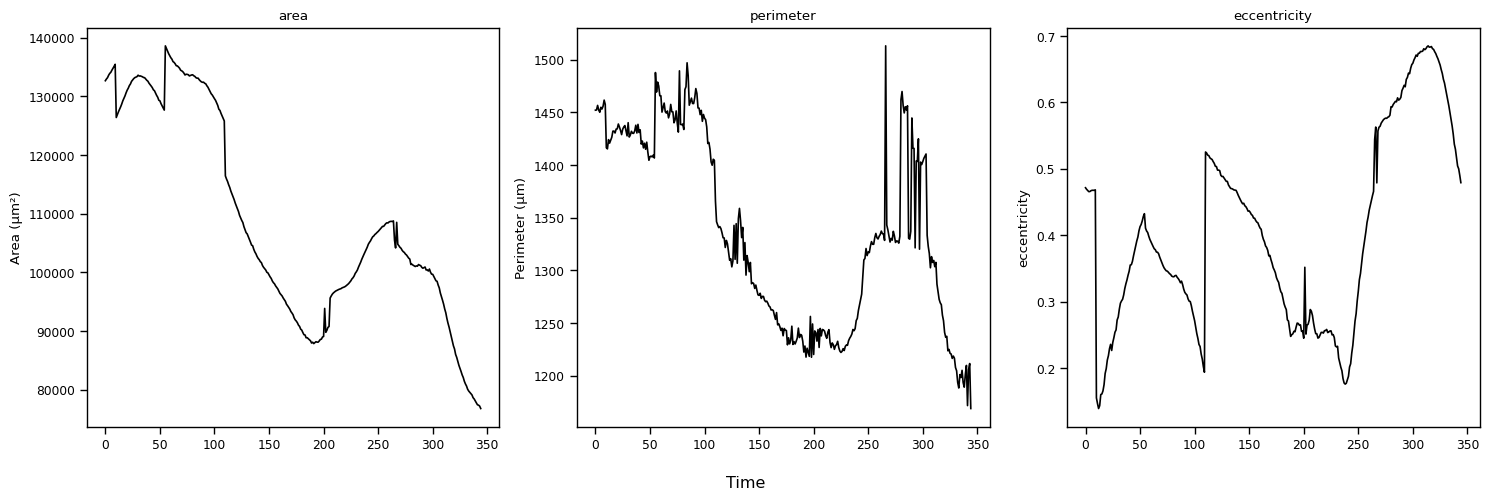

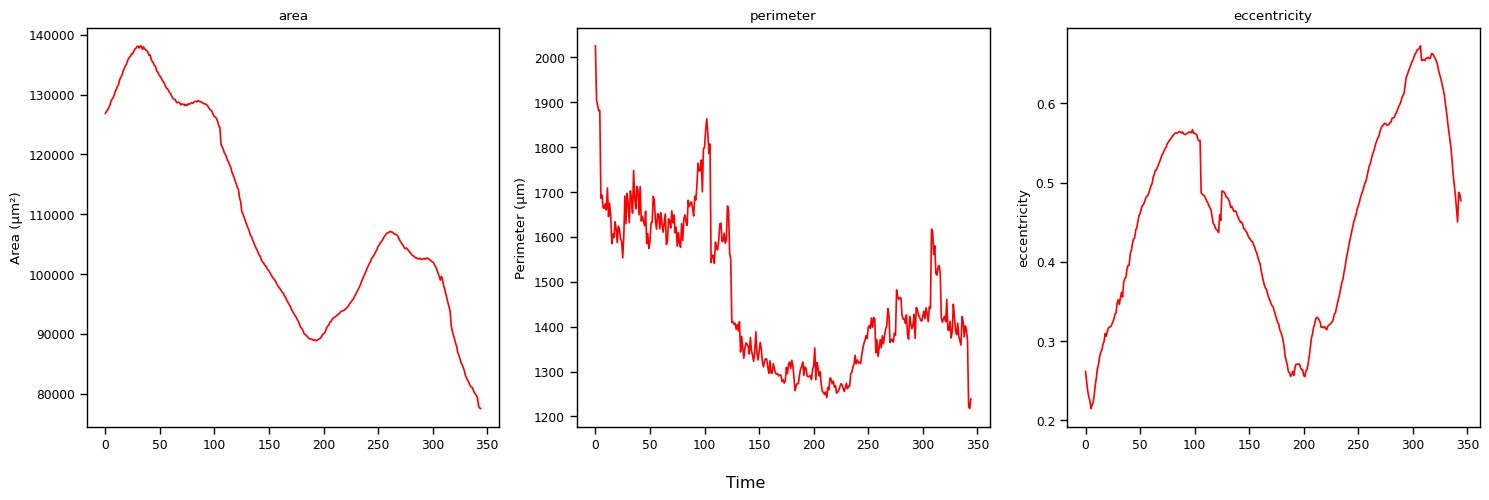

In [68]:
files = ['../data/features_otsu.csv','../data/features_chanvese.csv']
figure = ['../data/results/figures/otsu/','../data/results/figures/chanvese/']
color = ['black','red']
for i,j,k in zip(files,figure,color):
    compare(i,j,k)
    plt.savefig(j+"all_features.png",dpi=300)